In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from knn import KNNClassifier
import matplotlib

matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

In [14]:
iris = load_iris()  # 鸢尾花数据集
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
df.head()

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


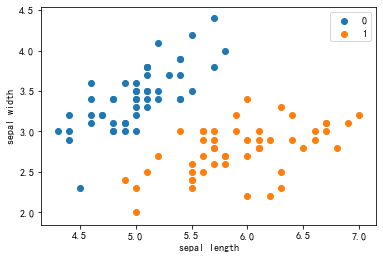

In [15]:
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [16]:
data = np.array(df.iloc[:100, [0, 1, -1]])
X, y = data[:, :-1], data[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)  # 留出法划分数据集

In [17]:
clf = KNNClassifier(n_neighbors=3, p=2)

In [18]:
clf.fit(X_train, y_train)

In [19]:
test_point = np.array([6.0, 3.0]).reshape(-1, 2)
predict_label = clf.predict(test_point)  # 预测点test_point所属的类
predict_label

array([1.])

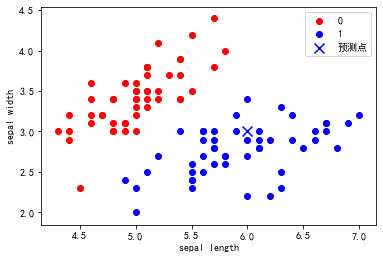

In [32]:
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], color='red', label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], color='b', label='1')
plt.scatter(test_point[0][0], test_point[0][1], s=100, color='b', marker='x', label='预测点')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [33]:
clf.score(X_test, y_test)  # 分类正确率

1.0